# Rank-Revealing QR

**Note:** `scipy.linalg`, not `numpy.linalg`!

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as pt

## Obtain a low-rank matrix

In [5]:
n = 100
A0 = np.random.randn(n, n)
U0, sigma0, VT0 = la.svd(A0)
print(la.norm((U0*sigma0)@VT0 - A0))

sigma = np.exp(-np.arange(n))

A = (U0 * sigma).dot(VT0)

2.654266110213982e-13


## Run the factorization

Compute the QR factorization with `pivoting=True`.

In [6]:
#clear
Q, R, perm = la.qr(A, pivoting=True)

First of all, check that we've obtained a valid factorization

In [7]:
la.norm(A[:, perm] - Q@R, 2)

6.317156500391685e-16

In [8]:
la.norm(Q@Q.T - np.eye(n))

7.773451587511033e-15

Next, examine $R$:

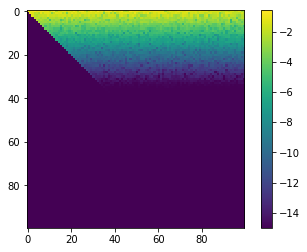

In [9]:
pt.imshow(np.log10(1e-15+np.abs(R)))
pt.colorbar()

Specifically, recall that the diagonal of $R$ in QR contains column norms:

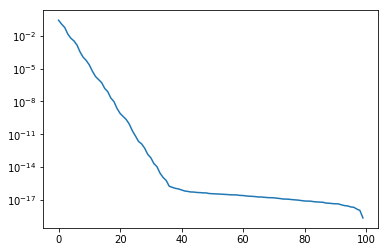

In [10]:
pt.semilogy(np.abs(np.diag(R)))

* In the case of `scipy`'s transform, diagonal entries of $R$ are guaranteed non-increasing.
* But there is a whole science to how to choose the permutations (or other source vectors)
    * and what promises one is able to make as a result of that